In [ ]:
with open('A3_single_prod_160GeV.csv', 'r') as inp, open('A3_single_prod_160GeV.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ' ')
        out.write(line)
with open('A3_single_prod_160GeV.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('A3_single_prod_160GeV.txt', 'w') as fout:
    fout.writelines(data[1:])

In [ ]:
with open('A3_single_prod_314p99GeV.csv', 'r') as inp, open('A3_single_prod_314p99GeV.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ' ')
        out.write(line)
with open('A3_single_prod_314p99GeV.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('A3_single_prod_314p99GeV.txt', 'w') as fout:
    fout.writelines(data[1:])

In [ ]:
with open('Z_plus_jets.csv', 'r') as inp, open('Z_plus_jets.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ' ')
        out.write(line)
with open('Z_plus_jets.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('Z_plus_jets.txt', 'w') as fout:
    fout.writelines(data[1:]) 

In [1]:
from __future__ import division
import ROOT
from ROOT import gSystem, gInterpreter
import root_numpy

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd


mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{inputenc}'
plt.rcParams.update({'font.size': 15})

Welcome to JupyROOT 6.22/02


In [2]:
f = ROOT.TFile.Open("/home/joao/Desktop/Root-analysis/1-BGL-MLProject/TMVA/TMVA_A3_single_prod_314p99GeV.root", "read")
tree_BDT = f.Get("dataset").Get("Method_BDT").Get("BDT")
tree_SVM = f.Get("dataset").Get("Method_SVM").Get("SVM")
tree_DNN = f.Get("dataset").Get("Method_DL").Get("DNN_GPU")

In [3]:
hist_testS_BDT = tree_BDT.Get('MVA_BDT_S')
hist_testB_BDT = tree_BDT.Get('MVA_BDT_B')
hist_trainS_BDT = tree_BDT.Get('MVA_BDT_Train_S')
hist_trainB_BDT = tree_BDT.Get('MVA_BDT_Train_B')


hist_testS_SVM = tree_SVM.Get('MVA_SVM_S')
hist_testB_SVM = tree_SVM.Get('MVA_SVM_B')
hist_trainS_SVM = tree_SVM.Get('MVA_SVM_Train_S')
hist_trainB_SVM = tree_SVM.Get('MVA_SVM_Train_B')

hist_testS_DNN_GPU = tree_DNN.Get('MVA_DNN_GPU_S')
hist_testB_DNN_GPU = tree_DNN.Get('MVA_DNN_GPU_B')
hist_trainS_DNN_GPU = tree_DNN.Get('MVA_DNN_GPU_Train_S')
hist_trainB_DNN_GPU = tree_DNN.Get('MVA_DNN_GPU_Train_B')

In [4]:
Nbins=50

In [5]:
errors_testS_BDT = []
errors_testB_BDT = []
errors_trainS_BDT = []
errors_trainB_BDT = []


errors_testS_SVM = []
errors_testB_SVM = []
errors_trainS_SVM = []
errors_trainB_SVM = []

errors_testS_DNN_GPU = []
errors_testB_DNN_GPU = []
errors_trainS_DNN_GPU = []
errors_trainB_DNN_GPU = []

In [6]:
for i in range(1, Nbins+1):
    errors_testS_BDT.append(hist_testS_BDT.GetBinError(i))
    errors_testB_BDT.append(hist_testB_BDT.GetBinError(i))
    errors_trainS_BDT.append(hist_trainS_BDT.GetBinError(i))
    errors_trainB_BDT.append(hist_trainB_BDT.GetBinError(i))

    errors_testS_SVM.append(hist_testS_SVM.GetBinError(i))
    errors_testB_SVM.append(hist_testB_SVM.GetBinError(i))
    errors_trainS_SVM.append(hist_trainS_SVM.GetBinError(i))
    errors_trainB_SVM.append(hist_trainB_SVM.GetBinError(i))

    errors_testS_DNN_GPU.append(hist_testS_DNN_GPU.GetBinError(i))
    errors_testB_DNN_GPU.append(hist_testB_DNN_GPU.GetBinError(i))
    errors_trainS_DNN_GPU.append(hist_trainS_DNN_GPU.GetBinError(i))
    errors_trainB_DNN_GPU.append(hist_trainB_DNN_GPU.GetBinError(i))
    

    bins_testS_BDT, data_testS_BDT = root_numpy.hist2array(hist_testS_BDT, return_edges=True)
    bins_testB_BDT, data_testB_BDT = root_numpy.hist2array(hist_testB_BDT, return_edges=True)
    bins_trainS_BDT, data_trainS_BDT = root_numpy.hist2array(hist_trainS_BDT, return_edges=True)
    bins_trainB_BDT, data_trainB_BDT = root_numpy.hist2array(hist_trainB_BDT, return_edges=True)
    
    bins_testS_SVM, data_testS_SVM = root_numpy.hist2array(hist_testS_SVM, return_edges=True)
    bins_testB_SVM, data_testB_SVM = root_numpy.hist2array(hist_testB_SVM, return_edges=True)
    bins_trainS_SVM, data_trainS_SVM = root_numpy.hist2array(hist_trainS_SVM, return_edges=True)
    bins_trainB_SVM, data_trainB_SVM = root_numpy.hist2array(hist_trainB_SVM, return_edges=True)
    
    bins_testS_DNN_GPU, data_testS_DNN_GPU = root_numpy.hist2array(hist_testS_DNN_GPU, return_edges=True)
    bins_testB_DNN_GPU, data_testB_DNN_GPU = root_numpy.hist2array(hist_testB_DNN_GPU, return_edges=True)
    bins_trainS_DNN_GPU, data_trainS_DNN_GPU = root_numpy.hist2array(hist_trainS_DNN_GPU, return_edges=True)
    bins_trainB_DNN_GPU, data_trainB_DNN_GPU = root_numpy.hist2array(hist_trainB_DNN_GPU, return_edges=True)
    

a_testS_BDT = data_testS_BDT[0]
a_testS_BDT = np.delete(a_testS_BDT, 0)
a_testB_BDT = data_testB_BDT[0]
a_testB_BDT = np.delete(a_testB_BDT, 0)
a_trainS_BDT = data_trainS_BDT[0]
a_trainS_BDT = np.delete(a_trainS_BDT, 0)
a_trainB_BDT = data_trainB_BDT[0]
a_trainB_BDT = np.delete(a_trainB_BDT, 0)

a_testS_SVM = data_testS_SVM[0]
a_testS_SVM = np.delete(a_testS_SVM, 0)
a_testB_SVM = data_testB_SVM[0]
a_testB_SVM = np.delete(a_testB_SVM, 0)
a_trainS_SVM = data_trainS_SVM[0]
a_trainS_SVM = np.delete(a_trainS_SVM, 0)
a_trainB_SVM = data_trainB_SVM[0]
a_trainB_SVM = np.delete(a_trainB_SVM, 0)

a_testS_DNN_GPU = data_testS_DNN_GPU[0]
a_testS_DNN_GPU = np.delete(a_testS_DNN_GPU, 0)
a_testB_DNN_GPU = data_testB_DNN_GPU[0]
a_testB_DNN_GPU = np.delete(a_testB_DNN_GPU, 0)
a_trainS_DNN_GPU = data_trainS_DNN_GPU[0]
a_trainS_DNN_GPU = np.delete(a_trainS_DNN_GPU, 0)
a_trainB_DNN_GPU = data_trainB_DNN_GPU[0]
a_trainB_DNN_GPU = np.delete(a_trainB_DNN_GPU, 0)

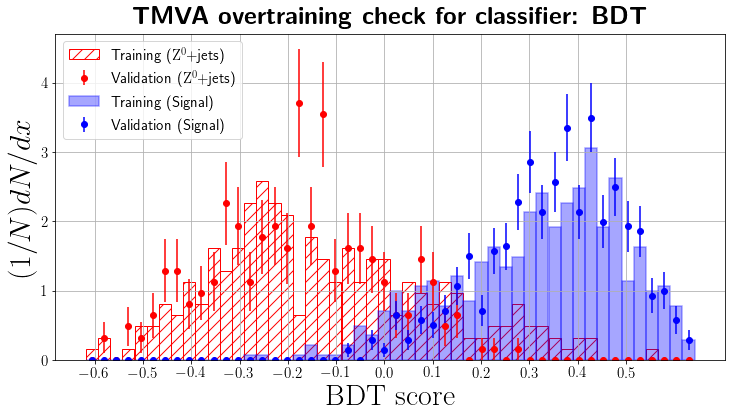

In [7]:
plt.figure(figsize=(12,6))
plt.bar(a_testB_BDT, bins_testB_BDT, width=0.025, alpha=1.0, color='w', label='Training ($\\mathrm{Z^0}+$jets)',edgecolor='red', linewidth=1.0, hatch='//r')
plt.errorbar(a_trainB_BDT, bins_trainB_BDT, yerr=errors_trainB_BDT, fmt='or', label='Validation ($\\mathrm{Z^0}+$jets)')

plt.bar(a_testS_BDT, bins_testS_BDT, width=0.025, alpha=0.35, color='b', label='Training (Signal)',edgecolor='blue', linewidth=1.5)
plt.errorbar(a_trainS_BDT, bins_trainS_BDT, yerr=errors_trainS_BDT, fmt='ob', label='Validation (Signal)')
plt.legend()
plt.xticks(np.arange(-0.6, 0.6, 0.1))
plt.grid()


plt.xlabel('$\\mathrm{BDT~score}$', fontsize=30)
plt.ylabel('$(1/N)dN/dx$', fontsize=30)
plt.title('\\textbf{TMVA overtraining check for classifier: BDT}',fontsize=25, pad=10.0)
plt.savefig('/home/joao/Desktop/Root-analysis/1-BGL-MLProject/Plots/BDT.pdf')

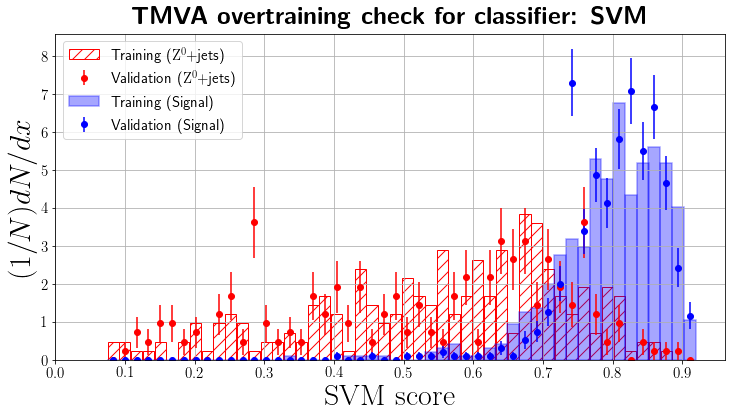

In [8]:
plt.figure(figsize=(12,6))
plt.bar(a_testB_SVM, bins_testB_SVM, width=0.016, alpha=1.0, color='w', label='Training ($\\mathrm{Z^0}+$jets)',edgecolor='red', linewidth=1.0, hatch='//r')
plt.errorbar(a_trainB_SVM, bins_trainB_SVM, yerr=errors_trainB_SVM, fmt='or', label='Validation ($\\mathrm{Z^0}+$jets)')

plt.bar(a_testS_SVM, bins_testS_SVM, width=0.017, alpha=0.35, color='b', label='Training (Signal)',edgecolor='blue', linewidth=1.5)
plt.errorbar(a_trainS_SVM, bins_trainS_SVM, yerr=errors_trainS_SVM, fmt='ob', label='Validation (Signal)')
plt.legend()
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()


plt.xlabel('$\\mathrm{SVM~score}$', fontsize=30)
plt.ylabel('$(1/N)dN/dx$', fontsize=30)
plt.title('\\textbf{TMVA overtraining check for classifier: SVM}',fontsize=25, pad=10.0)
plt.savefig('/home/joao/Desktop/Root-analysis/1-BGL-MLProject/Plots/SVM.pdf')

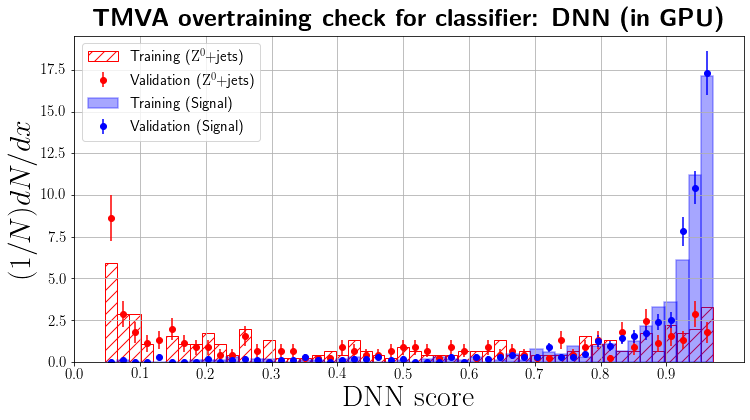

In [9]:
plt.figure(figsize=(12,6))
plt.bar(a_testB_DNN_GPU, bins_testB_DNN_GPU, width=0.018, alpha=1.0, color='w', label='Training ($\\mathrm{Z^0}+$jets)',edgecolor='red', linewidth=1.0, hatch='//r')
plt.errorbar(a_trainB_DNN_GPU, bins_trainB_DNN_GPU, yerr=errors_trainB_DNN_GPU, fmt='or', label='Validation ($\\mathrm{Z^0}+$jets)')

plt.bar(a_testS_DNN_GPU, bins_testS_DNN_GPU, width=0.019, alpha=0.35, color='b', label='Training (Signal)',edgecolor='blue', linewidth=1.5)
plt.errorbar(a_trainS_DNN_GPU, bins_trainS_DNN_GPU, yerr=errors_trainS_DNN_GPU, fmt='ob', label='Validation (Signal)')
plt.legend()
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()


plt.xlabel('$\\mathrm{DNN~score}$', fontsize=30)
plt.ylabel('$(1/N)dN/dx$', fontsize=30)
plt.title('\\textbf{TMVA overtraining check for classifier: DNN (in GPU)}',fontsize=25, pad=10.0)
plt.savefig('/home/joao/Desktop/Root-analysis/1-BGL-MLProject/Plots/DNN_GPU.pdf')

In [10]:
tree_LH_ROC = f.Get("dataset").Get("Method_Likelihood").Get('Likelihood')
tree_Fisher_ROC = f.Get("dataset").Get("Method_Fisher").Get('Fisher')
tree_DNN_ROC = f.Get("dataset").Get("Method_DL").Get('DNN_GPU')
tree_BDTD_ROC = f.Get("dataset").Get("Method_BDT").Get('BDTD')
tree_MLP_ROC = f.Get("dataset").Get("Method_MLP").Get('MLPBNN')
tree_BDTB_ROC = f.Get("dataset").Get("Method_BDT").Get('BDTB')
tree_BDTG_ROC = f.Get("dataset").Get("Method_BDT").Get('BDTG')
tree_SVM_ROC = f.Get("dataset").Get("Method_SVM").Get('SVM')
tree_BDTF_ROC = f.Get("dataset").Get("Method_BDT").Get('BDTF')
tree_BDT_ROC = f.Get("dataset").Get("Method_BDT").Get('BDT')

In [11]:
hist_LH_ROC = tree_LH_ROC.Get('MVA_Likelihood_rejBvsS')
hist_Fisher_ROC = tree_Fisher_ROC.Get('MVA_Fisher_rejBvsS')
hist_DNN_GPU_ROC = tree_DNN_ROC.Get('MVA_DNN_GPU_rejBvsS')
hist_BDTD_ROC = tree_BDTD_ROC.Get('MVA_BDTD_rejBvsS')
hist_MLP_ROC = tree_MLP_ROC.Get('MVA_MLPBNN_rejBvsS')
hist_BDTB_ROC = tree_BDTB_ROC.Get('MVA_BDTB_rejBvsS')
hist_BDTG_ROC = tree_BDTG_ROC.Get('MVA_BDTG_rejBvsS')
hist_SVM_ROC = tree_SVM_ROC.Get('MVA_SVM_rejBvsS')
hist_BDTF_ROC = tree_BDTF_ROC.Get('MVA_BDTF_rejBvsS')
hist_BDT_ROC = tree_BDT_ROC.Get('MVA_BDT_rejBvsS')

In [12]:
for i in range(1, Nbins+1):
    bins_LH_ROC, data_LH_ROC = root_numpy.hist2array(hist_LH_ROC, return_edges=True)
    bins_Fisher_ROC, data_Fisher_ROC = root_numpy.hist2array(hist_Fisher_ROC, return_edges=True)
    bins_DNN_GPU_ROC, data_DNN_GPU_ROC = root_numpy.hist2array(hist_DNN_GPU_ROC, return_edges=True)
    bins_BDTD_ROC, data_BDTD_ROC = root_numpy.hist2array(hist_BDTD_ROC, return_edges=True)
    bins_MLP_ROC, data_MLP_ROC = root_numpy.hist2array(hist_MLP_ROC, return_edges=True)
    bins_BDTB_ROC, data_BDTB_ROC = root_numpy.hist2array(hist_BDTB_ROC, return_edges=True)
    bins_BDTG_ROC, data_BDTG_ROC = root_numpy.hist2array(hist_BDTG_ROC, return_edges=True)
    bins_SVM_ROC, data_SVM_ROC = root_numpy.hist2array(hist_SVM_ROC, return_edges=True)
    bins_BDTF_ROC, data_BDTF_ROC = root_numpy.hist2array(hist_BDTF_ROC, return_edges=True)
    bins_BDT_ROC, data_BDT_ROC = root_numpy.hist2array(hist_BDT_ROC, return_edges=True)

        
a_LH_ROC = data_LH_ROC[0]
a_LH_ROC = np.delete(a_LH_ROC, 0)
a_Fisher_ROC = data_Fisher_ROC[0]
a_Fisher_ROC = np.delete(a_Fisher_ROC, 0)
a_DNN_GPU_ROC = data_DNN_GPU_ROC[0]
a_DNN_GPU_ROC = np.delete(a_DNN_GPU_ROC, 0)
a_BDTD_ROC = data_BDTD_ROC[0]
a_BDTD_ROC = np.delete(a_BDTD_ROC, 0)
a_MLP_ROC = data_MLP_ROC[0]
a_MLP_ROC = np.delete(a_MLP_ROC, 0)
a_BDTB_ROC = data_BDTB_ROC[0]
a_BDTB_ROC = np.delete(a_BDTB_ROC, 0)
a_BDTG_ROC = data_BDTG_ROC[0]
a_BDTG_ROC = np.delete(a_BDTG_ROC, 0)
a_SVM_ROC = data_SVM_ROC[0]
a_SVM_ROC = np.delete(a_SVM_ROC, 0)
a_BDTF_ROC = data_BDTF_ROC[0]
a_BDTF_ROC = np.delete(a_BDTF_ROC, 0)
a_BDT_ROC = data_BDT_ROC[0]
a_BDT_ROC = np.delete(a_BDT_ROC, 0)

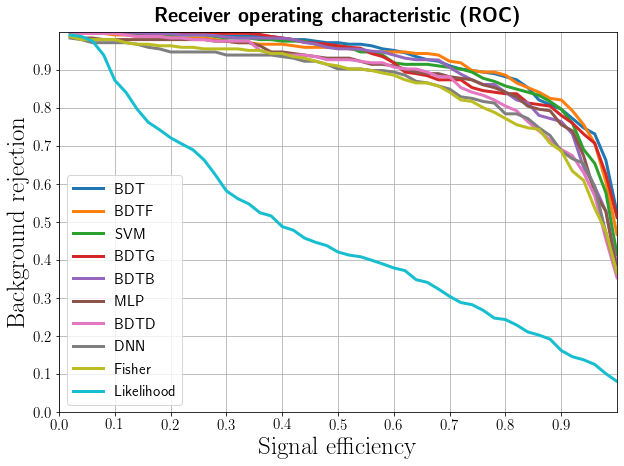

In [13]:
plt.figure(figsize=(10,7))

plt.plot(a_BDT_ROC, bins_BDT_ROC, label='BDT', linewidth=3.0)
plt.plot(a_BDTF_ROC, bins_BDTF_ROC, label='BDTF', linewidth=3.0)
plt.plot(a_SVM_ROC, bins_SVM_ROC, label='SVM', linewidth=3.0)
plt.plot(a_BDTG_ROC, bins_BDTG_ROC, label='BDTG', linewidth=3.0)
plt.plot(a_BDTB_ROC, bins_BDTB_ROC, label='BDTB', linewidth=3.0)
plt.plot(a_MLP_ROC, bins_MLP_ROC, label='MLP', linewidth=3.0)
plt.plot(a_BDTD_ROC, bins_BDTD_ROC, label='BDTD', linewidth=3.0)
plt.plot(a_DNN_GPU_ROC, bins_DNN_GPU_ROC, label='DNN', linewidth=3.0)
plt.plot(a_Fisher_ROC, bins_Fisher_ROC, label='Fisher', linewidth=3.0)
plt.plot(a_LH_ROC, bins_LH_ROC, label='Likelihood', linewidth=3.0)



plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid()


plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\mathrm{Signal~efficiency}$', fontsize=25)
plt.ylabel('$\\mathrm{Background~rejection}$', fontsize=25)
plt.title('\\textbf{Receiver operating characteristic (ROC)}',fontsize=20, pad=10.0)
plt.savefig('/home/joao/Desktop/Root-analysis/1-BGL-MLProject/Plots/ROC.pdf')

In [14]:
Signal = pd.read_csv('/home/joao/Desktop/Root-analysis/1-BGL-MLProject/Data/A3_single_prod_314p99GeV.csv')
Z_plus_jets = pd.read_csv('/home/joao/Desktop/Root-analysis/1-BGL-MLProject/Data/Z_plus_jets.csv')

In [15]:
plt.rcParams.update({'font.size': 90})

In [16]:
#Drop variables
Vars = ['pt_j1j3', 'MH2_2', 'MH2_3', 'DR_lep1lep2', 'pt_jet1', 'pt_jet2', 'pt_jet3', 'pt_jet4',
        'E_j2', 'M_j2j3']

Signal = Signal[Vars]
Z_plus_jets = Z_plus_jets[Vars]

In [17]:
np.transpose(list(Signal))

array(['pt_j1j3', 'MH2_2', 'MH2_3', 'DR_lep1lep2', 'pt_jet1', 'pt_jet2',
       'pt_jet3', 'pt_jet4', 'E_j2', 'M_j2j3'], dtype='<U11')

In [18]:
np.transpose(list(Z_plus_jets))

array(['pt_j1j3', 'MH2_2', 'MH2_3', 'DR_lep1lep2', 'pt_jet1', 'pt_jet2',
       'pt_jet3', 'pt_jet4', 'E_j2', 'M_j2j3'], dtype='<U11')

In [19]:
labels = ['$p_T(j_3, j_4)$ (GeV)', '$M(j_1,j_2,\\ell^+,\\ell^-)$ (GeV)', '$M(j_1,j_4,\\ell^+,\\ell^-)$ (GeV)',
          '$\\Delta R (\\ell^+, \\ell^-)$', '$p_T(j_1)$ (GeV)' ,'$p_T(j_2)$ (GeV)', '$p_T(j_3)$ (GeV)', '$p_T(j_4)$ (GeV)',
          '$E(j_2)$ (GeV)', '$M(j_1, j_2)$ (GeV)']

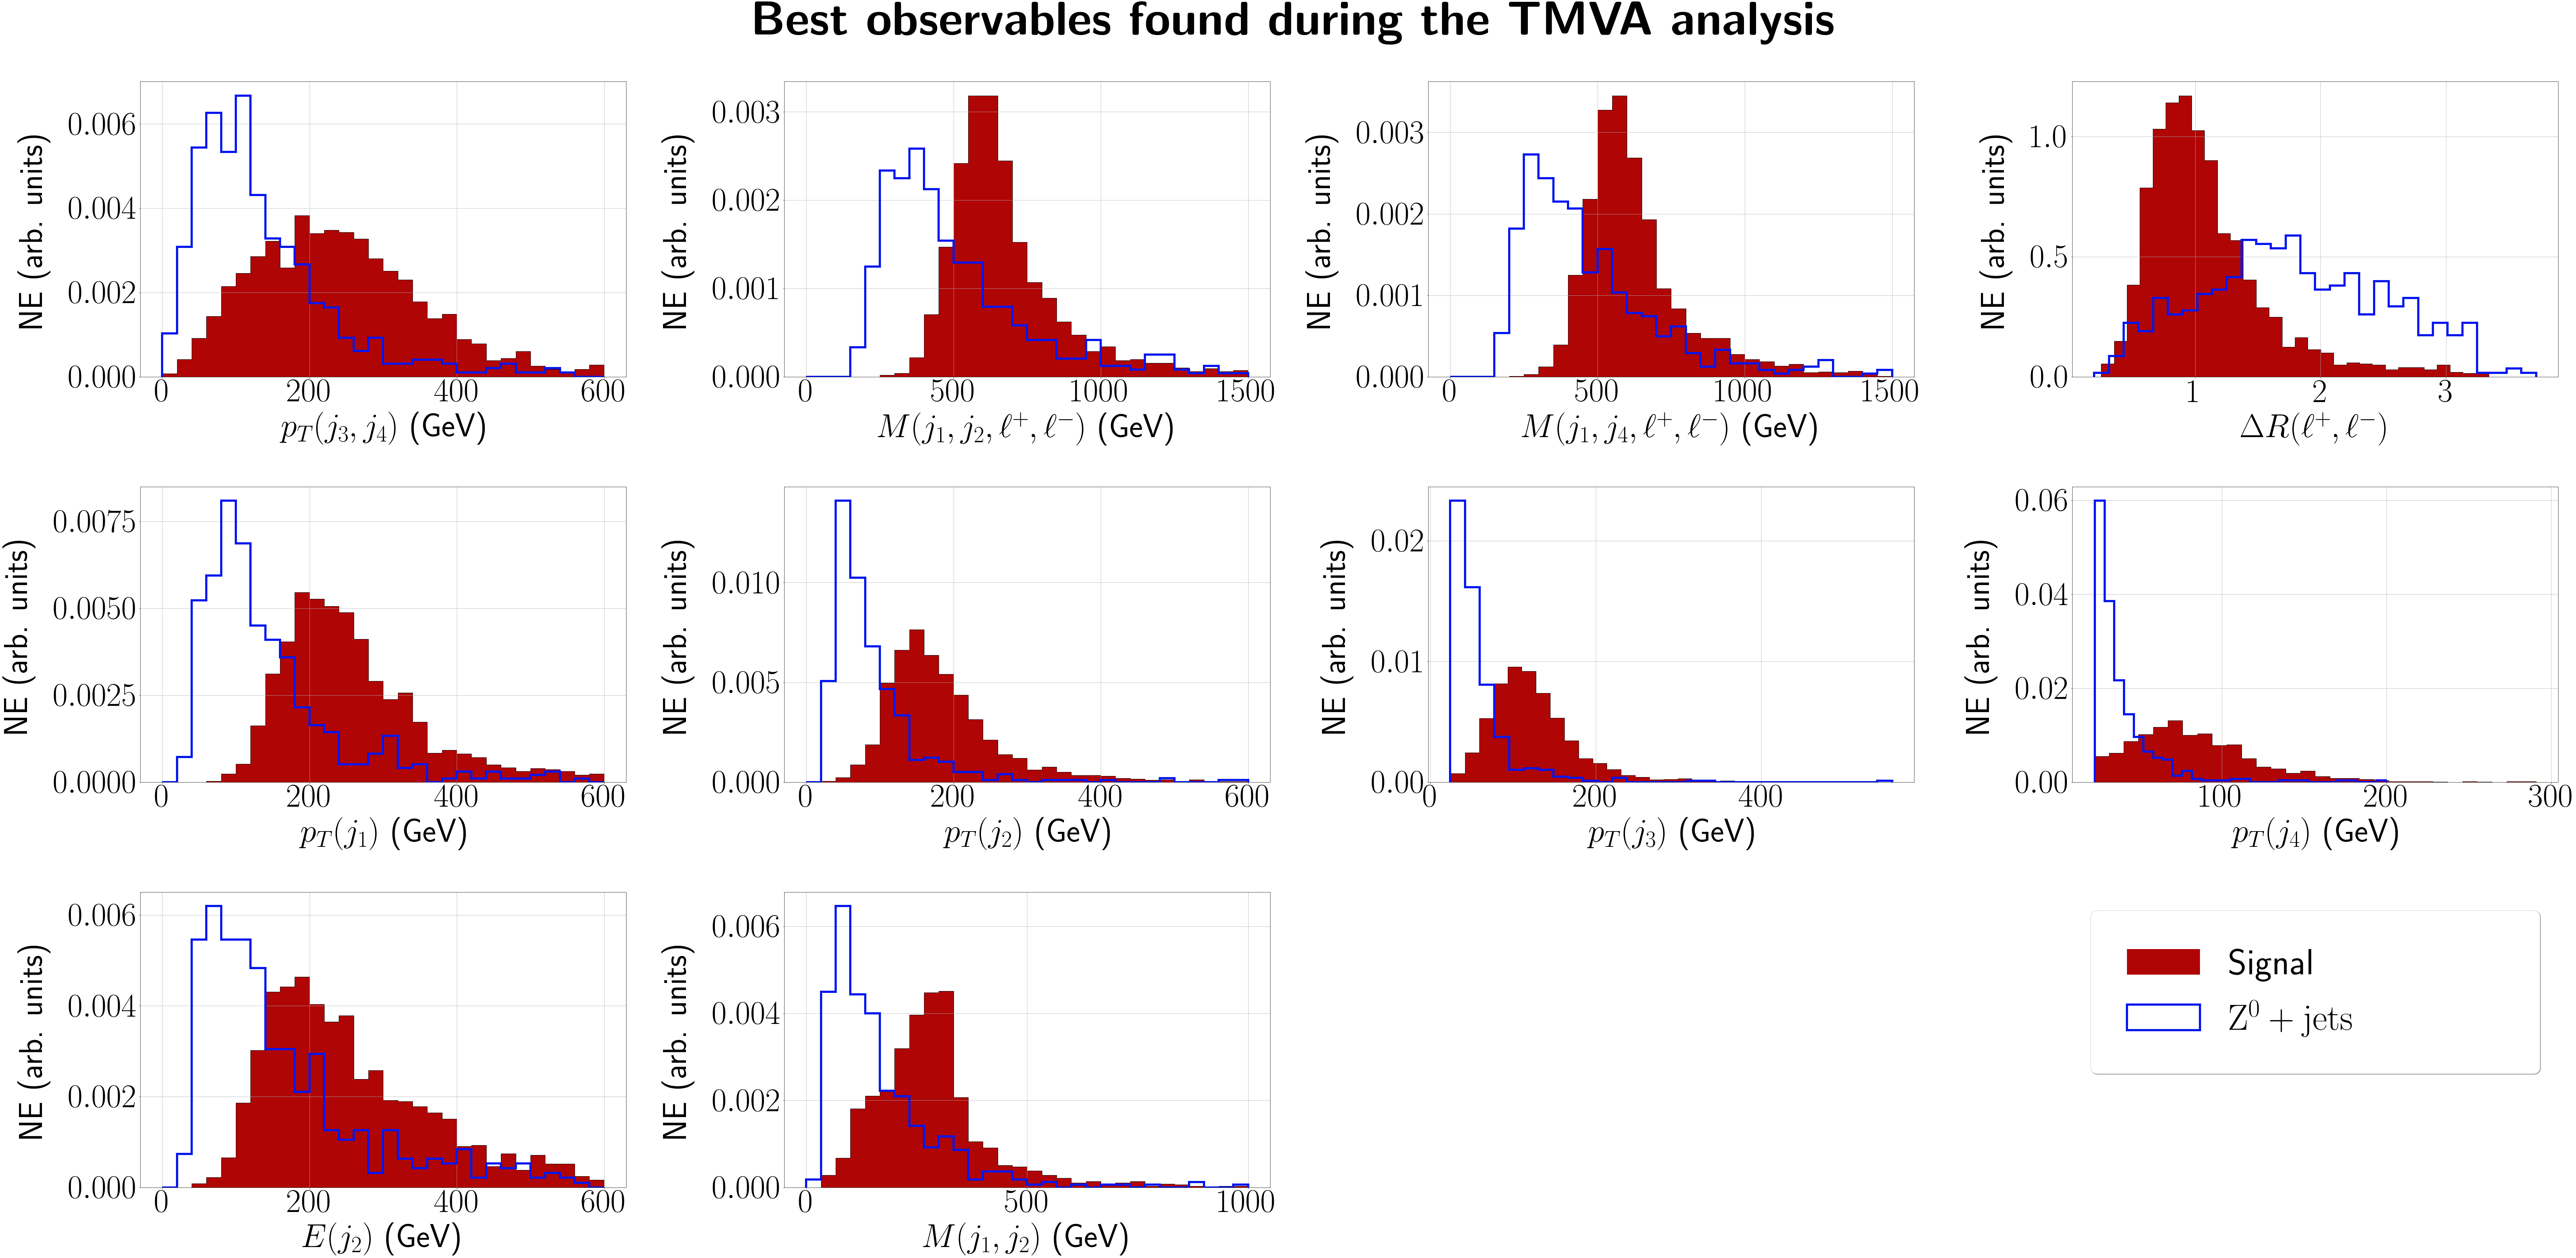

In [20]:
num_cols=4
N=len(labels)+1
fig, axes = plt.subplots(nrows=3,ncols=num_cols,figsize=(100,50))
fig.tight_layout(pad=5.0)
axes = axes.flatten()


for i, feature in enumerate(labels):
    
    var_signal = Signal.iloc[:,i]
    var_z_plus_jets = Z_plus_jets.iloc[:,i]
    
    if (feature == '$p_T(j_3, j_4)$ (GeV)' or feature == '$p_T(j_1)$ (GeV)' or feature == '$p_T(j_2)$ (GeV)'
        or feature == '$E(j_2)$ (GeV)'):
        var_signal.hist(ax=axes[i],range=(0,600),bins=30,density=True,edgecolor='black',color='#b00505',histtype="stepfilled",label="Signal")
        var_z_plus_jets.hist(ax=axes[i],range=(0,600),bins=30,density=True,edgecolor='#0216f0',color="#0216f0",histtype="step",label="$\\mathrm{Z^0+jets}$", linewidth=6.0)
        axes[i].set_xlabel(feature, labelpad = 10.0)
        axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)  
    elif (feature == '$M(j_1, j_2)$ (GeV)'):
        var_signal.hist(ax=axes[i],range=(0,1000),bins=30,density=True,edgecolor='black',color='#b00505',histtype="stepfilled",label="Signal")
        var_z_plus_jets.hist(ax=axes[i],range=(0,1000),bins=30,density=True,edgecolor='#0216f0',color="#0216f0",histtype="step",label="$\\mathrm{Z^0+jets}$", linewidth=6.0)
        axes[i].set_xlabel(feature, labelpad = 10.0)
        axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)
    elif (feature == '$M(j_1,j_2,\\ell^+,\\ell^-)$ (GeV)' or feature == '$M(j_1,j_4,\\ell^+,\\ell^-)$ (GeV)'):
        var_signal.hist(ax=axes[i],range=(0,1500),bins=30,density=True,edgecolor='black',color='#b00505',histtype="stepfilled",label="Signal")
        var_z_plus_jets.hist(ax=axes[i],range=(0,1500),bins=30,density=True,edgecolor='#0216f0',color="#0216f0",histtype="step",label="$\\mathrm{Z^0+jets}$", linewidth=6.0)
        axes[i].set_xlabel(feature, labelpad = 10.0)
        axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)
    else:
        var_signal.hist(ax=axes[i],bins=30,density=True,edgecolor='black',color='#b00505',histtype="stepfilled",label="Signal")
        var_z_plus_jets.hist(ax=axes[i],bins=30,density=True,edgecolor='#0216f0',color="#0216f0",histtype="step",label="$\\mathrm{Z^0+jets}$", linewidth=6.0)
        axes[i].set_xlabel(feature, labelpad = 10.0)
        axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)
    


axes[10].axis('off')
axes[11].axis('off')      
axes[11].hist([], color='#b00505',histtype="stepfilled",label="Signal", linewidth=6.0)
axes[11].hist([], color="#0216f0",histtype="step",label="$\\mathrm{Z^0+jets}$", linewidth=6.0)
axes[11].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 100})

fig.suptitle('\\textbf{Best observables found during the TMVA analysis}',fontsize=130) 
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('//home/joao/Desktop/Root-analysis/1-BGL-MLProject/Plots/Best_of_the_best.pdf')
#plt.show()